## Package Installation

In [1]:
#!pip install CFEDemands --upgrade
#!pip install xarray
#!pip install dvc[gdrive]
#!pip install h5netcdf

#### Decryption of service account private keys

In [2]:
#### Need private keys from json file (we're authenticating using "service accounts")
!gpg --batch --passphrase "noodle octopus" -d ../students.json.gpg > ../students.json

gpg: AES256 encrypted data
gpg: encrypted with 1 passphrase


## 1.4. #A Estimate Demand System

Estimate (or use an already estimated) a system of demands for different kinds of food, obtaining estimates of parameters that can then be used to describe demands as a function of prices, budgets, and household characteristics. 

In [3]:
COUNTRY = 'Uganda'

URL = {'Uganda':'https://docs.google.com/spreadsheets/d/1yVLriVpo7KGUXvR3hq_n53XpXlD5NmLaH1oOMZyV0gQ/'}

DAYS_PER_PERIOD = {'Uganda':7} # Number of days of expenditure recall

#### Regression using cfe package and Uganda data:

In [4]:
import cfe
import numpy as np
from eep153_tools import read_sheets

x = read_sheets(URL[COUNTRY],json_creds='../students.json',sheet='Expenditures').set_index(['j','t','m'])
x.columns.name = 'i'
x = x.replace(0,np.nan)
y = np.log(x)

z = read_sheets(URL[COUNTRY],json_creds='../students.json',sheet='HH Characteristics').set_index(['j','t','m'])
z.columns.name = 'k'

p = read_sheets(URL[COUNTRY],json_creds='../students.json',sheet='Prices').set_index(['t','m'])
p.columns.name = 'i'

r = cfe.Result(y=y,z=z,prices=p)

r.get_alpha()

<xarray.DataArray 'alpha' (i: 51)>
array([6.53768225, 7.50063762, 8.36062567, 6.42569934,        nan,
       5.88298914, 6.59267655,        nan, 8.06387989, 6.81373699,
       4.62810795, 5.96261349, 5.57476067, 6.52091002, 6.18239895,
       7.01568643, 6.83232327,        nan, 7.27711885, 6.22987069,
              nan, 6.80711135, 6.61974529, 6.00952031, 7.38689459,
       6.33561184, 4.99413882, 5.65836122, 6.88331019, 6.05304126,
       5.4457854 , 5.57966261,        nan, 6.86444698,        nan,
       6.24196563, 6.19778925, 7.0835447 , 8.07426364, 6.70828337,
       4.23355769, 6.16670014, 7.07705233, 5.98578684, 6.64451758,
       5.7732948 , 6.72114524, 4.52247658, 5.81634032,        nan,
              nan])
Coordinates:
  * i        (i) object 'Beans' 'Beef' 'Beer' ... 'Water' 'Wheat (flour)'

In [5]:
r

<xarray.Result>
Dimensions:           (i: 51, j: 10159, k: 15, kp: 15, m: 1, t: 6)
Coordinates:
  * j                 (j) object '1013000201' '1013000202' ... 'H4301001'
  * i                 (i) object 'Beans' 'Beef' ... 'Water' 'Wheat (flour)'
  * t                 (t) object '2005-06' '2009-10' ... '2013-14' '2015-16'
  * m                 (m) object 'Uganda'
  * k                 (k) <U9 'F 00-03' 'M 00-03' ... 'M 51+' 'log HSize'
  * kp                (kp) <U9 'F 00-03' 'M 00-03' ... 'M 51+' 'log HSize'
Data variables: (12/20)
    alpha             (i) float64 6.538 7.501 8.361 6.426 ... 5.816 nan nan
    beta              (i) float64 0.2344 0.3721 0.5759 0.6146 ... 0.462 nan nan
    delta             (k, i) float64 -0.018 -0.02526 -0.01543 ... nan nan
    prices            (i, t, m) float64 600.0 1.25e+03 ... 2.5e+03 2.7e+03
    characteristics   (k, j, t, m) float64 0.0 0.0 0.0 0.0 ... nan nan nan 1.946
    loglambdas        (j, t, m) float64 -1.233 0.01116 -0.6326 ... nan -0.4518
    ...                ...
    se_beta           object None
    se_alpha          (i) float64 0.01585 0.01851 0.07667 ... 0.01593 0.0 0.0
    se_a              (i, t, m) float64 0.01585 0.01713 0.0173 ... nan nan nan
    y                 (i, j, m, t) float64 nan nan nan nan ... nan nan nan nan
    logp              (i, t, m) float64 6.397 7.131 7.313 ... nan 7.824 7.901
    z                 (k, j, t, m) float64 0.0 0.0 0.0 0.0 ... nan nan nan 1.946
Attributes:
    firstround:            2005-06
    min_proportion_items:  0.125
    min_xproducts:         30
    useless_expenditures:  False
    stderr_tol:            0.01
    indices:               Indices(j='j', t='t', m='m', i='i', k='k')
    verbose:               False

### $\alpha$ values:

In [6]:
r.get_alpha(as_df=True).sort_values(ascending=False)

i
Beer              8.360626
Restaurant        8.074264
Chicken           8.063880
Beef              7.500638
Matoke            7.386895
Goat meat         7.277119
Pork              7.083545
Soda              7.077052
Fresh fish        7.015686
Other Alcohol     6.883310
Other foods       6.864447
Fresh milk        6.832323
Cigarettes        6.813737
Irish potato      6.807111
Sweet Potatoes    6.721145
Rice              6.708283
Sugar             6.644518
Maize             6.619745
Cassava           6.592677
Beans             6.537682
Dried fish        6.520910
Bun               6.425699
Millet            6.335612
Passion fruit     6.241966
Ground nut        6.229871
Peas              6.197789
Eggs              6.182399
Sim sim           6.166700
Other Fruit       6.053041
Mangos            6.009520
Sorghum           5.985787
Cooking oil       5.962613
Cabbages          5.882989
Tomatoes          5.816340
Sweet Banana      5.773295
Oranges           5.658361
Other Veg.        5.579663

### Elasticity $\beta$ values:

In [7]:
r.get_beta(as_df=True).dropna().sort_values(ascending=False)

i
Other foods       0.709945
Passion fruit     0.689185
Coffee            0.655771
Bun               0.614612
Other Fruit       0.575993
Beer              0.575916
Fresh milk        0.570633
Restaurant        0.566696
Oranges           0.560503
Sweet Banana      0.558044
Cigarettes        0.533225
Soda              0.512992
Other Tobacco     0.497631
Tomatoes          0.462044
Eggs              0.454384
Cooking oil       0.454043
Other Veg.        0.439217
Matoke            0.438673
Other Alcohol     0.424832
Onions            0.423031
Sugar             0.412710
Mangos            0.396619
Rice              0.391052
Fresh fish        0.387190
Goat meat         0.377250
Beef              0.372068
Peas              0.353778
Pork              0.352783
Dodo              0.337421
Dried fish        0.337026
Chicken           0.324125
Irish potato      0.320683
Ground nut        0.310636
Cabbages          0.302597
Tea               0.297064
Sorghum           0.275993
Maize             0.248386

#### Household Characteristics $\delta\$:

In [8]:
r.delta.to_dataframe().unstack('k')

delta                                                    \
k                 F 00-03   M 00-03   F 04-08   M 04-08   F 09-13   M 09-13   
i                                                                             
Beans           -0.017999 -0.019997  0.034981  0.025129  0.052855  0.067315   
Beef            -0.025260 -0.019040  0.019889  0.017515  0.035193  0.047792   
Beer            -0.015431 -0.037448 -0.036532 -0.056217  0.018052  0.067258   
Bun             -0.087353 -0.043017 -0.006391 -0.022244  0.040575  0.014229   
Butter, etc.          NaN       NaN       NaN       NaN       NaN       NaN   
Cabbages        -0.003930 -0.020378 -0.009994 -0.020097  0.037094  0.027214   
Cassava          0.004183  0.002645  0.065387  0.083604  0.056505  0.098783   
Cassava (flour)       NaN       NaN       NaN       NaN       NaN       NaN   
Chicken         -0.039953 -0.035256  0.015808 -0.003141  0.022267 -0.018970   
Cigarettes      -0.025908 -0.063922  0.015616  0.113987  0.083046  0.059124   
Coffee          -0.027479  0.027863  0.086817  0.033373  0.002732  0.053016   
Cooking oil     -0.052017 -0.042827 -0.025481 -0.040402  0.012932 -0.004322   
Dodo            -0.002092  0.001183  0.009070  0.042759  0.054516  0.108621   
Dried fish      -0.007132 -0.034193  0.021437  0.010934  0.034846  0.043176   
Eggs            -0.111515 -0.040928 -0.005256  0.022695  0.014971 -0.007691   
Fresh fish      -0.005652 -0.016875 -0.004744  0.047308  0.042384  0.008839   
Fresh milk       0.038668  0.006766 -0.040441 -0.017075 -0.009191 -0.002797   
Ghee                  NaN       NaN       NaN       NaN       NaN       NaN   
Goat meat       -0.009948 -0.031334  0.057223  0.037727  0.023939  0.002169   
Ground nut      -0.015400  0.014885  0.032595  0.044799  0.053178  0.055597   
Infant formula        NaN       NaN       NaN       NaN       NaN       NaN   
Irish potato    -0.028844  0.069238  0.026367  0.104606  0.104731  0.134742   
Maize            0.048070  0.038393  0.090715  0.047528  0.116153  0.106549   
Mangos          -0.002556 -0.048436 -0.020819  0.013212 -0.022345  0.032423   
Matoke          -0.028418 -0.063157  0.016977  0.018634  0.025365  0.021329   
Millet           0.003166  0.002094  0.008477  0.024802  0.031641  0.024919   
Onions          -0.073857 -0.066738 -0.036582 -0.032100  0.008960 -0.009403   
Oranges         -0.044841 -0.003362  0.043257  0.108533 -0.007226  0.042115   
Other Alcohol   -0.093747 -0.073196 -0.013331  0.021273 -0.020351 -0.022924   
Other Fruit     -0.008104 -0.045404  0.022932  0.051983  0.027286  0.111805   
Other Tobacco   -0.079231 -0.059524  0.012811  0.091704  0.046680  0.094636   
Other Veg.      -0.014914 -0.018256  0.011129  0.056522  0.017122  0.048217   
Other drinks          NaN       NaN       NaN       NaN       NaN       NaN   
Other foods      0.012370 -0.105676 -0.008227 -0.098526  0.029583  0.126961   
Other meat            NaN       NaN       NaN       NaN       NaN       NaN   
Passion fruit   -0.032325 -0.021104 -0.038923 -0.038386 -0.028887 -0.030652   
Peas            -0.026376 -0.062569 -0.023970 -0.004245  0.016232  0.059109   
Pork            -0.053361 -0.062371  0.007876 -0.025853  0.032283  0.058846   
Restaurant      -0.136361 -0.110116 -0.038271 -0.047448  0.038828  0.022121   
Rice            -0.008266 -0.010510  0.048031  0.018254  0.051108  0.067770   
Salt             0.010307  0.024054  0.020341  0.020422  0.033765  0.032349   
Sim sim         -0.006530 -0.004682 -0.011156  0.054149  0.006429 -0.058446   
Soda            -0.049268 -0.016470 -0.055025 -0.065570  0.073619  0.005283   
Sorghum         -0.105442  0.031807 -0.072370 -0.016549 -0.004487 -0.020145   
Sugar           -0.026405 -0.023338  0.008981  0.011660  0.034377  0.020004   
Sweet Banana    -0.031568 -0.091101 -0.039908  0.000858 -0.006773 -0.017748   
Sweet Potatoes   0.016238  0.044871  0.098942  0.091506  0.085182  0.112549   
Tea             -0.022437 -0.015441  0.019902  0.011493  0.026469  0.0

### Marshallian Demand

As mentioned above, we&rsquo;ve estimated the parameters of a Frischian
demand system (demands that depend on prices and the households
marginal utility of expenditures).  But we can *compute* the
corresponding Marshallian (depends on prices and budget) or Hicksian
(depends on prices and the level of utility) demands for this same
population, using the `cfe.Result.demands` method.  

Let&rsquo;s compute Marshallian demands.  Start with a choice of budget $x$
and prices.  We&rsquo;ll use the earliest prices, and focus on
the first market we&rsquo;re interested in.



In [9]:
t = r.coords['t'].data.flatten()[5] #my_t = 2015-16
m = r.coords['m'][0] # Uganda

x = r.get_predicted_expenditures().sum('i')
median_x = x.where(x>0).sel(t=t,m=m).median('j') # Budget (median household)

p = r.prices.sel(t=t,m=m).fillna(1).copy()

p.to_dataframe().fillna(1).squeeze()

,t,m,prices
i,,,
Beans,2015-16,Uganda,2000.000000
Beef,2015-16,Uganda,8000.000000
Beer,2015-16,Uganda,4400.000000
Bun,2015-16,Uganda,3600.000000
"Butter, etc.",2015-16,Uganda,7000.000000
Cabbages,2015-16,Uganda,1.000000
Cassava,2015-16,Uganda,866.666667
Cassava (flour),2015-16,Uganda,1.000000
Chicken,2015-16,Uganda,1.000000


Now compute demands.  The object `r` already knows what the estimated
parameters are, and uses those automatically:



In [10]:
c=r.demands(median_x,p).sort_values(ascending=False)
c

i
Other foods       1026.599336
Restaurant         502.951522
Sweet Banana       126.657020
Eggs                62.056338
Chicken             34.969733
Cabbages            14.274431
Other Fruit          6.964629
Matoke               5.974547
Beer                 5.233382
Fresh milk           5.018990
Oranges              4.221396
Mangos               4.192394
Passion fruit        2.897402
Dodo                 2.809216
Irish potato         2.638138
Soda                 2.606969
Other Alcohol        2.530021
Fresh fish           2.452814
Cooking oil          2.112580
Bun                  2.014494
Sugar                1.888627
Tomatoes             1.885732
Rice                 1.872768
Sweet Potatoes       1.846402
Sorghum              1.727400
Dried fish           1.714351
Maize                1.703465
Peas                 1.699709
Beef                 1.693561
Beans                1.539002
Goat meat            1.499924
Pork                 1.491065
Millet               1.378326
Cassava 

Text(0, 0.5, 'Price')

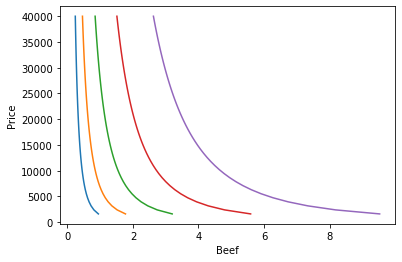

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

USE_GOOD = 'Beef'
    
# Values for prices
ref_price = r.prices.sel(i=USE_GOOD,t=t,m=m)
P = np.linspace(ref_price/5,ref_price*5,50)

def my_prices(p0,p=p,i=USE_GOOD):
    p = p.copy()
    p.loc[i] = p0
    return p

for myx in [median_x*s for s in [.25,.5,1.,2,4]]:
    plt.plot([r.demands(myx,my_prices(p0))[USE_GOOD] for p0 in P],P)

plt.xlabel(USE_GOOD)
plt.ylabel('Price')

Text(0.5, 0, 'Budget')

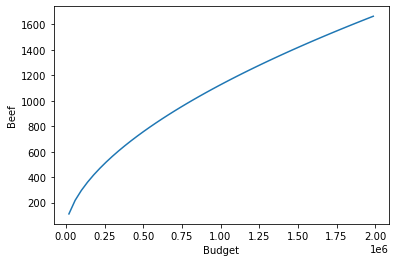

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

USE_GOOD = 'Beef'
    
# Values for prices
ref_price = r.prices.sel(i=USE_GOOD,t=t,m=m)

# Range of budgets to consider
X = np.linspace(median_x/10,median_x*10,50)

plt.plot(X,[r.demands(x,ref_price)[USE_GOOD] for x in X])

plt.ylabel(USE_GOOD)
plt.xlabel('Budget')

#### Plotting Food Demands



Now we&rsquo;re interested in predicting what quantities of different
   kinds of food *would* have been, if something (e.g., a price,
   budget, household characteristics) was different.



#### Ceteris paribus

We begin by setting up some benchmarks for prices and budgets, so
   the things we don&rsquo;t want to change we can hold fixed.



In [13]:
### First year, first market, and some good.  Change if you wish! ###
my_t = r.coords['t'].data.flatten()[5] #my_t = 2015-16
my_m = r.coords['m'].data.flatten()[0] #my_m = Uganda
my_i = 'Beef'
#####################################################################

p = r.prices.sel(t=my_t,m=my_m,drop=True)
phat = p.to_dataframe('i').dropna().squeeze()

ref_price = r.prices.sel(i=my_i,t=my_t,m=my_m)
P = np.linspace(ref_price/10,ref_price*5,50)

def my_prices(p0,p=phat,i=my_i):
    """
    Set price of good i to p0, holding remaining prices fixed at values in p.
    """
    p = p.copy()
    p.loc[i] = p0
    return p.squeeze()

#### Prices of foods for a year (2015-2016) and market (Uganda) (phat):

In [14]:
phat

i
Beans              2000.000000
Beef               8000.000000
Beer               4400.000000
Bun                3600.000000
Butter, etc.       7000.000000
Cassava             866.666667
Cigarettes        22500.000000
Coffee             8000.000000
Cooking oil        1363.636364
Dodo                225.000000
Dried fish         2500.000000
Fresh fish         2000.000000
Fresh milk         1000.000000
Ghee              13333.333330
Goat meat          9000.000000
Ground nut         4000.000000
Infant formula    31250.000000
Irish potato        800.000000
Maize              1600.000000
Mangos              200.000000
Matoke              500.000000
Millet             2000.000000
Onions             2800.000000
Oranges             400.000000
Other Alcohol      2000.000000
Other Fruit         266.666667
Other Tobacco     12307.692310
Other Veg.         5000.000000
Other drinks       2200.000000
Other meat         6000.000000
Passion fruit      2000.000000
Peas               2000.000000
Pork  

In [15]:
#xbar = sum of predicted expenditures
xbar = r.get_predicted_expenditures().sum('i')

#median_x = median of sum of predicted expenditures
median_x = xbar.where(xbar>0).sel(t=my_t,m=my_m).median('j') # Budget (median household)

In [16]:
xhat = r.get_predicted_expenditures().sel(t=my_t, m=my_m, drop=True).mean('j')

xhatdf = xhat.to_dataframe('i').dropna()

phat_2 = p.to_dataframe('i').dropna()

qhat = xhatdf.div(phat_2, axis=1).dropna()

#predicted quantity demanded of foods by median household
qhat

,i
i,
Beans,2.656345
Beef,1.244642
Beer,2.504724
Bun,0.985225
Cassava,7.820822
Cigarettes,0.161367
Coffee,0.053898
Cooking oil,1.263708
Dodo,6.110011


#### Plot demand schedule:

Text(0, 0.5, 'Price of Beef')

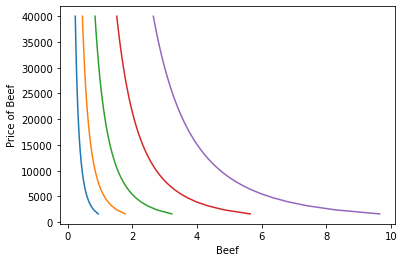

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

# Values for prices
ref_price = r.prices.sel(i=my_i,t=my_t,m=my_m)
P = np.linspace(ref_price/5,ref_price*5,50)

for x in [median_x*s for s in [.25,.5,1.,2,4]]:
    plt.plot([r.demands(x,my_prices(p0))[my_i] for p0 in P],P)

plt.xlabel(my_i)
plt.ylabel('Price of %s' % my_i)

## 1.5. #A Construct Nutrient System. 

If you can describe quantities demanded as a function of prices, budgets, and household characteristics, and map quantities into nutrients, then you can also describe a system of nutrients as a function of the same variables.

The nutrient value of food consumed by the household is just the
   product of its diet and a food conversion table.  So let&rsquo;s write a
   function that describes that product:



In [18]:
# Get FCT table from url:
fct = read_sheets(URL[COUNTRY],
                  json_creds='../students.json',
                  sheet='FCT').set_index('i')
fct.columns.name='n'
fct

n,Energy,Protein,Fiber,Folate,Calcium,Carbohydrate,Iron,Niacin,Riboflavin,Thiamin,Vitamin A,Vitamin B-12,Vitamin B-6,Vitamin C,Zinc
i,,,,,,,,,,,,,,,
Beans,1060,65,50,1040,270,191,16.0,2.86,0.49,0.87,0,0.0,0.73,14,7.0
Beef,2910,264,0,50,90,0,27.0,33.50,2.20,0.50,0,18.5,1.70,0,60.0
Beer,430,5,0,60,40,35,0.0,5.10,0.30,0.10,0,0.2,0.50,0,0.0
Bread,2660,76,20,1110,1510,506,37.0,43.85,3.31,4.55,0,0.0,0.84,0,7.0
Bun,2660,76,20,1110,1510,506,37.0,43.85,3.31,4.55,0,0.0,0.84,0,7.0
Cabbages,250,13,30,430,400,58,5.0,2.34,0.40,0.61,50,0.0,1.24,366,2.0
Cassava,1600,14,20,270,160,381,3.0,8.54,0.48,0.87,10,0.0,0.88,206,3.0
Cassava (flour),3140,26,40,360,310,766,19.0,14.00,0.50,3.10,70,0.0,7.00,720,7.0
Chapati,2750,91,20,240,860,557,14.0,21.42,0.97,2.67,0,0.0,0.34,0,8.0


In [19]:
# Helper function which takes in 
# budget x and price vector p
def nutrient_demand(x,p):
    c = r.demands(x,p)
    fct0,c0 = fct.align(c,axis=0,join='inner')
    N = fct0.T@c0

    N = N.loc[~N.index.duplicated()]
    
    return N

With this `nutrient_demand` function in hand, we can see how nutrient
 outcomes vary with budget, given prices:


Text(0, 0.5, 'log nutrient')

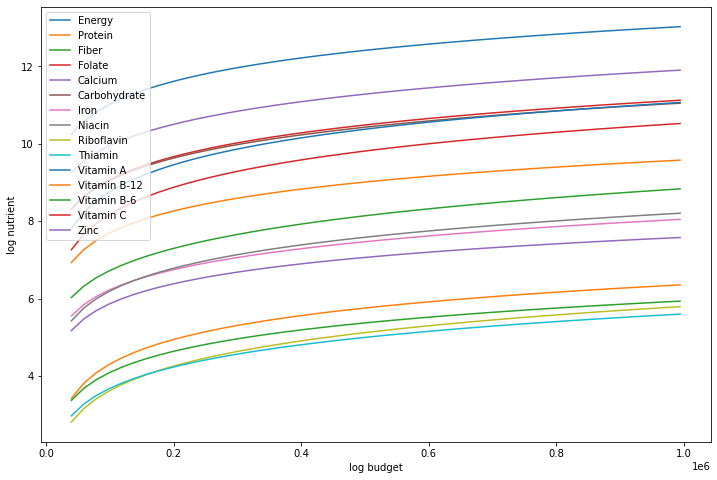

In [20]:
import numpy as np
import pandas as pd

### If you're getting lots of not useful warnings you want to ignore
# import warnings
# warnings.filterwarnings('ignore',category=UserWarning)
####################################################################

X = np.linspace(median_x/5,median_x*5,50)

UseNutrients = fct.columns.tolist()

plt.figure(figsize=(12,8))
plt.plot(X,pd.concat({x:np.log(nutrient_demand(x,p))[UseNutrients] for x in X},axis=1).T)
plt.legend(UseNutrients)
plt.xlabel('log budget')
plt.ylabel('log nutrient')

Text(0, 0.5, 'log nutrient')

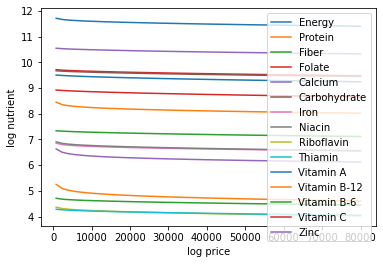

In [21]:
USE_GOOD = 'Beef'

ref_price = r.prices.sel(i=USE_GOOD,t=t,m=m,drop=True)

P = np.linspace(ref_price/10,ref_price*10,50)

plt.plot(P,pd.DataFrame({p0:np.log(nutrient_demand(median_x,my_prices(p0,i=USE_GOOD)))[UseNutrients] for p0 in P}).T)
plt.legend(UseNutrients)
plt.xlabel('log price')
plt.ylabel('log nutrient')

## 1.6. #A Nutritional challenges & Policy Goal.

Compare predicted nutrition to recommended nutrition. Establish some criteria for deciding what the biggest nutritional challenges are for this population. For example, what share of households is Calorie deficient? Protein deficient? Vitamin A deficient? Note that different criteria are possible, and there is no one “right” criterion. Characterize the nutritional challenges you observe in your data, and construct a policy goal to address some of these challenges (e.g., reduce the proportion of households that are protein deficient by half). 


### Computing nutritional requirements



Individuals have nutritional requirements established by nutrition
 scientists.  Here we grab one such set of requirements:



In [22]:
rdi = read_sheets(URL[COUNTRY],
                  json_creds='../students.json',
                  sheet='RDI').set_index('n').replace(np.nan,0)
rdi.columns.name = 'k'

rdi = rdi.replace('',0)
rdi

k,M 00-03,F 04-08,M 04-08,F 09-13,M 09-13,F 14-18,M 14-18,F 19-30,M 19-30,F 31-50,M 31-50,F 51+,M 51+
n,,,,,,,,,,,,,
Energy,1000.0,1200.0,1400.0,1600.0,1800.0,1800.0,2200.0,2000.0,2400.0,1800.0,2200.0,1600.0,2000.0
Protein,13.0,19.0,19.0,34.0,34.0,46.0,52.0,46.0,56.0,46.0,56.0,46.0,56.0
Fiber,14.0,16.8,19.6,22.4,25.2,25.2,30.8,28.0,33.6,25.2,30.8,22.4,28.0
Folate,150.0,200.0,200.0,300.0,300.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0
Calcium,700.0,1000.0,1000.0,1300.0,1300.0,1300.0,1300.0,1000.0,1000.0,1000.0,1000.0,1200.0,1000.0
Carbohydrate,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0
Iron,7.0,10.0,10.0,8.0,8.0,15.0,11.0,18.0,8.0,18.0,8.0,8.0,8.0
Magnesium,80.0,130.0,130.0,240.0,240.0,360.0,410.0,310.0,400.0,320.0,420.0,320.0,420.0
Niacin,6.0,8.0,8.0,12.0,12.0,14.0,16.0,14.0,16.0,14.0,16.0,14.0,16.0


#### Nutritional Needs of Households

Our data on demand and nutrients is at the *household* level; we
    can&rsquo;t directly compare household level nutrition with individual
    level requirements.  What we **can** do is add up minimum individual
    requirements, and see whether household total exceed these.  This
    isn&rsquo;t a guarantee that all individuals have adequate nutrition
    (since the way food is allocated in the household might be quite
    unequal, or unrelated to individual requirements), but it is
    *necessary* if all individuals are to have adequate nutrition.

For the average household, the number of different kinds of people
can be computed by averaging over households:



In [23]:
# Find average household characteristics for reference period & place
zbar = r.z.sel(t=my_t,m=my_m,drop=True).mean('j').to_dataframe()
zbar

,z
k,
F 00-03,0.191225
M 00-03,0.180635
F 04-08,0.396369
M 04-08,0.377307
F 09-13,0.367020
M 09-13,0.377307
F 14-18,0.323449
M 14-18,0.357943
F 19-30,0.483812


Now, the inner/dot/matrix product between `zbar` and the `rda`
 DataFrame of requirements will give us minimum requirements for the
 average household:


In [24]:
# This matrix product gives minimum nutrient requirements for average
# household in reference year & place
my_rdi,my_zbar = rdi.align(zbar.T,axis=1,join='inner')
hh_rdi = my_rdi@my_zbar.T

# But this is per *day*, while our data is per week:
hh_rdi = hh_rdi*DAYS_PER_PERIOD[COUNTRY]
hh_rdi

,z
n,
Energy,58209.077156
Protein,1316.605749
Fiber,814.927080
Folate,10938.532526
Calcium,35116.278366
Carbohydrate,4179.116490
Iron,353.967020
Magnesium,9487.996974
Niacin,416.695915


#### Nutritional Adequacy of Food Demands



Since we can trace out demands for nutrients as a function of $(x,p)$,
 and we&rsquo;ve computed minimum nutritional requirements for the average
 household, we can *normalize* nutritional intake to check the adequacy
 of diet.



In terms of normalized nutrients, any household with more than one
 unit of any given nutrient (or zero in logs) will be consuming a
 minimally adequate level of the nutrient; below this level there&rsquo;s
 clearly nutritional inadequacy.  For this reason the ratio of
 actual nutrients to required nutrients is termed the &ldquo;nutrient
 adequacy ratio,&rdquo; or NAR.



In [25]:
def nutrient_adequacy_ratio(x,p):
    return (nutrient_demand(x,p)/hh_rdi.T).squeeze()

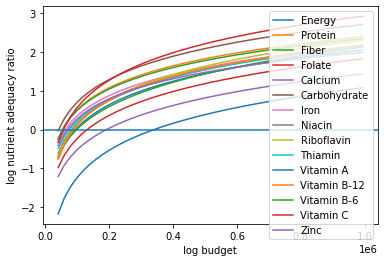

In [26]:
plt.plot(X,pd.concat({x:np.log(nutrient_adequacy_ratio(x,p))[UseNutrients] for x in X},axis=1).T)
plt.legend(UseNutrients)
plt.xlabel('log budget')
plt.ylabel('log nutrient adequacy ratio')
plt.axhline(0)

In [27]:
xbar = r.get_predicted_expenditures().sel(t=my_t,m=my_m).sum('i')
xbar = xbar.where(xbar>0)

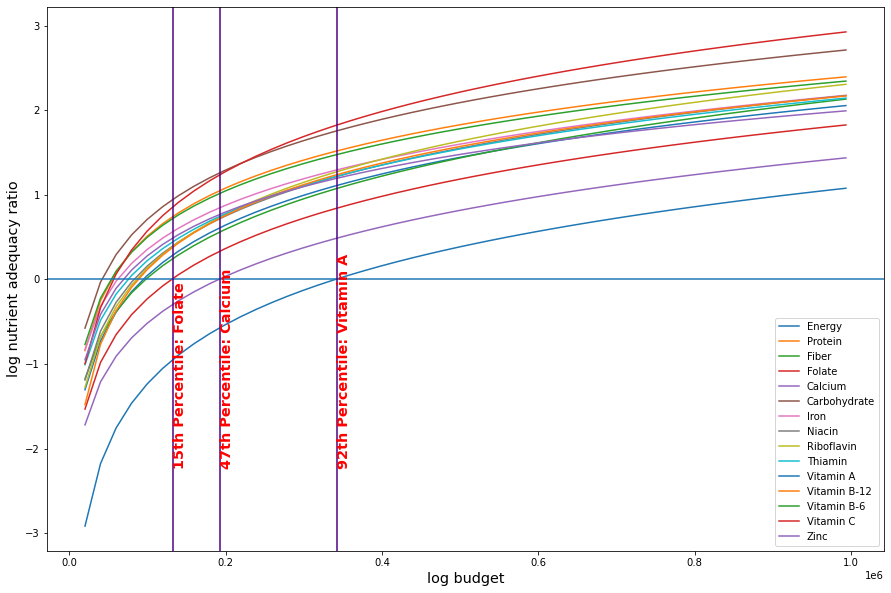

In [135]:
# household budget percentiles
q1 = xbar.quantile(0.15, 'j') # budget of households at 15th percentile
q2 = xbar.quantile(0.47, 'j') # budget of households at 47th percentile
q3 = xbar.quantile(0.91, 'j') # budget of households at 91th percentile
q_med = xbar.quantile(0.5, 'j') #median household

# Vitamin A, Calcium, Folate 
UseNutrients = fct.columns.tolist()
plt.figure(figsize=(15,10))
plt.plot(X,pd.concat({x:np.log(nutrient_adequacy_ratio(x,p))[UseNutrients] for x in X},axis=1).T)
plt.legend(UseNutrients)
plt.xlabel('log budget', fontsize='x-large')
plt.ylabel('log nutrient adequacy ratio', fontsize='x-large')
plt.axhline(0)
plt.axvline(q1, c='indigo')
plt.axvline(q2, c='indigo')
plt.axvline(q3, c='indigo')

plt.text(q1,-2.2,'15th Percentile: Folate',rotation=90, c='red', fontsize='x-large', fontweight='bold')
plt.text(q2,-2.2,'47th Percentile: Calcium',rotation=90, c='red', fontsize='x-large', fontweight='bold')
plt.text(q3,-2.2,'92th Percentile: Vitamin A',rotation=90, c='red', fontsize='x-large', fontweight='bold')
plt.show()

Add prices to each food item to fct_cpy dataframe so we can compare nutrition/price ratio and choose the best item to subsidize (i.e. subsidize foods that have the highest vitamin A/ calcium/ folate per price ratio)

In [29]:
fct_cpy = fct.copy()

for idx in fct_cpy.index:
    try:
        fct_cpy.loc[idx, 'Price'] = r.prices.sel(i=idx,t=t,m=m).values.item()
        fct_cpy.loc[idx, 'Vitamin A/price'] = fct_cpy.loc[idx, 'Vitamin A'] / fct_cpy.loc[idx, 'Price']
        fct_cpy.loc[idx, 'Calcium/price'] = fct_cpy.loc[idx, 'Calcium'] / fct_cpy.loc[idx, 'Price']
        fct_cpy.loc[idx, 'Folate/price'] = fct_cpy.loc[idx, 'Folate'] / fct_cpy.loc[idx, 'Price']
    except:
        pass

Create Vitamin A/price, Calcium/price and Folate/price Columns:

In [57]:
fct_cpy[['Calcium/price', 'Vitamin A/price', 'Folate/price']]

n,Calcium/price,Vitamin A/price,Folate/price
i,,,
Dodo,9.555556,6.488889,3.777778
Matoke,0.060000,1.120000,0.440000
Ghee,0.003000,0.630000,0.000000
Fresh milk,1.130000,0.280000,0.050000
Oranges,1.000000,0.275000,0.725000
Tomatoes,0.064516,0.270968,0.096774
Passion fruit,0.055000,0.240000,0.040000
Peas,0.125000,0.190000,0.325000
Maize,0.050000,0.068750,0.087500


Text(0.5, 1.0, 'Nutrition/price')

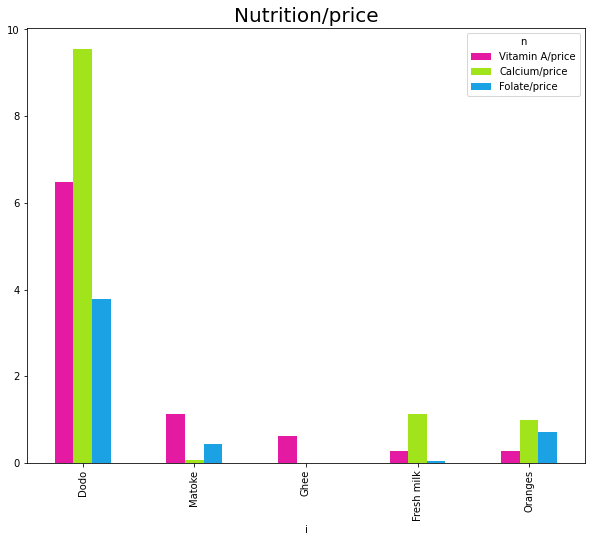

In [108]:
fct_cpy.sort_values(by=['Vitamin A/price', 'Calcium/price', 'Folate/price'], ascending=False)[['Vitamin A/price', 'Calcium/price', 'Folate/price']].head().plot(kind='bar', figsize=(10,8), color=['#E41BA2', '#A2E41B', '#1BA2E4'])
plt.title('Nutrition/price', fontsize = 20)

In [64]:
fct_cpy.sort_values(by=['Calcium/price'], ascending=False)['Calcium/price'].head()

i
Dodo              9.555556
Sim sim           4.062500
Fresh milk        1.130000
Oranges           1.000000
Sweet Potatoes    0.820000
Name: Calcium/price, dtype: float64

In [65]:
fct_cpy.sort_values(by=['Folate/price'], ascending=False)['Folate/price'].head()

i
Dodo       3.777778
Oranges    0.725000
Beans      0.520000
Matoke     0.440000
Sim sim    0.404167
Name: Folate/price, dtype: float64

As before, we can also vary relative prices.  Here we trace out
 nutritional adequacy varying the price of a single good:



In [137]:
UseNutrients = ['Vitamin A', 'Calcium', 'Folate']

In [138]:
fct_cpy.loc['Dodo', 'Price']

225.0

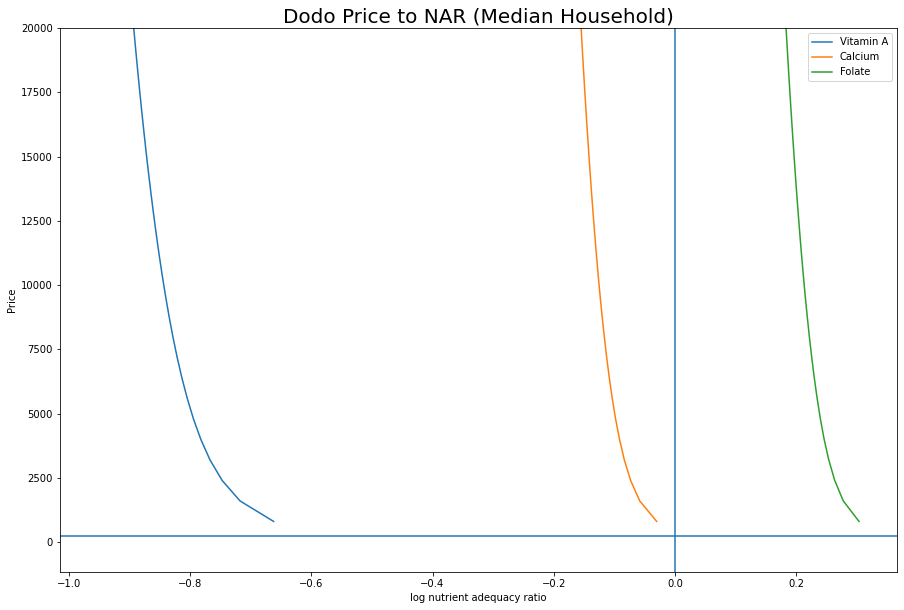

In [163]:
income = xbar.quantile(0.5, 'j')

plt.figure(figsize=(15,10))
plt.plot(pd.concat({p0:np.log(nutrient_adequacy_ratio(income,my_prices(p0,i='Dodo')))[UseNutrients] for p0 in P},axis=1).T,P)
plt.legend(UseNutrients)
plt.ylabel('Price')
plt.xlabel('log nutrient adequacy ratio')
plt.axvline(0)
plt.ylim(top=20000)
plt.axhline(p.sel(i='Dodo').values)
plt.title('Dodo Price to NAR (Median Household)', fontsize = 20)
plt.show()

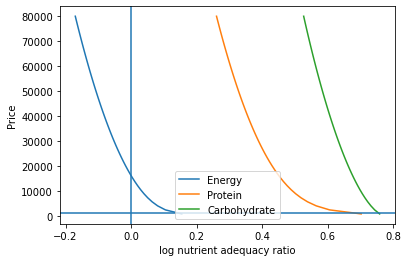

In [33]:
poorer_x = median_x/2

plt.plot(pd.concat({p0:np.log(nutrient_adequacy_ratio(poorer_x,my_prices(p0,i=my_i)))[UseNutrients] for p0 in P},axis=1).T,P)
plt.legend(UseNutrients)
plt.ylabel('Price')
plt.xlabel('log nutrient adequacy ratio')
plt.axvline(0)
plt.axhline(p.sel(i='Fresh milk').values)

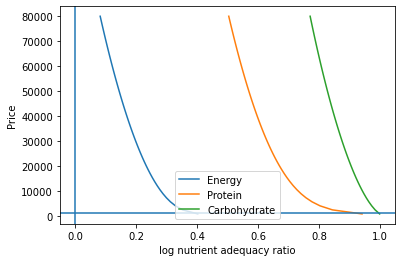

In [34]:
poorer_x = q1

plt.plot(pd.concat({p0:np.log(nutrient_adequacy_ratio(poorer_x,my_prices(p0,i=my_i)))[UseNutrients] for p0 in P},axis=1).T,P)
plt.legend(UseNutrients)
plt.ylabel('Price')
plt.xlabel('log nutrient adequacy ratio')
plt.axvline(0)
plt.axhline(p.sel(i='Fresh milk').values)

## 1.7. #B Policy Options.

 Design two or more policies which achieve your policy goal. For example, targeted income transfers to increase households’ food budgets, or subsidies or taxes to change the relative price of foods. Use simulation to show that the proposed policies achieve the policy goal. 

In [35]:
UseNutrients = list(fct.columns)
UseNutrients

['Energy',
 'Protein',
 'Fiber',
 'Folate',
 'Calcium',
 'Carbohydrate',
 'Iron',
 'Niacin',
 'Riboflavin',
 'Thiamin',
 'Vitamin A',
 'Vitamin B-12',
 'Vitamin B-6',
 'Vitamin C',
 'Zinc']

### Simple Policy Experiments



Consider two policies:  First, changing income so that some proportion
 of the population achieves nutritional adequacy.  Here choose quantile
 we&rsquo;re interested in (e.g., a quantile of 0.5 is the median; a quantile
 of 0.25 is the household at the 25th percentage point of the distribution).



In [36]:
# A quantile of 0.5 is the median.  Play with quantile value, or just assign.
xbar = r.get_predicted_expenditures().sel(t=my_t,m=my_m).sum('i')

# Drop households with /no/ predicted expenditures
xbar = xbar.where(xbar>0)

x0 = xbar.quantile(0.5,'j') # Budget (median household)
#x0 = 50

# Range of budgets to explore
X = np.linspace(x0/10,x0*5,50)

In [37]:
xbar.quantile(1,'j')

<xarray.DataArray ()>
array(1337875.09636285)
Coordinates:
    quantile  float64 1.0

### Compensated Policy Experiments



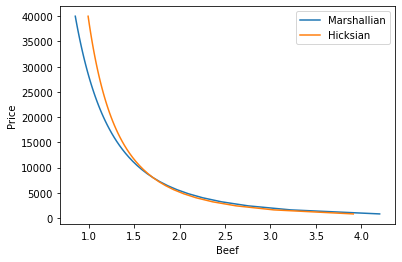

In [38]:
import matplotlib.pyplot as plt

#my_i = 'Milk'
my_i = 'Beef'
ref_price = r.prices.sel(i=my_i,t=my_t,m=my_m)
P = np.linspace(ref_price/10,ref_price*5,50)

U0 = r.indirect_utility(x0,p)

### If you're getting lots of not useful warnings you want to ignore
# import warnings
# warnings.filterwarnings('ignore',category=UserWarning)
####################################################################

plt.plot([r.demands(x0,my_prices(p0,i=my_i))[my_i] for p0 in P],P)
plt.plot([r.demands(U0,my_prices(p0,i=my_i),type="Hicksian")[my_i] for p0 in P],P)
plt.ylabel('Price')
plt.xlabel(my_i)
#plt.axhline(p.sel(i=my_i).values)
plt.legend(("Marshallian","Hicksian"))

In [39]:
def compensating_variation(U0,p0,p1):
    x0 = r.expenditure(U0,p0)
    x1 = r.expenditure(U0,p1)

    return x1-x0

def revenue(U0,p0,p1,type='Marshallian'):
    """(Un)Compensated revenue from taxes changing vector of prices from p0 to p1.

    Note that this is only for *demand* side (i.e., if supply perfectly elastic).
    """
    
    dp = p1 - p0 # Change in prices

    c = r.demands(U0,p1,type=type)

    dp,c = dp.align(c,join='inner')

    return dp.T@c


def deadweight_loss(U0,p0,p1):
    """
    Deadweight loss of tax/subsidy scheme creating wedge in prices from p0 to p1.

    Note that this is only for *demand* side (i.e., if supply perfectly elastic).
    """
    cv = compensating_variation(U0,p0,p1)

    return cv - revenue(U0,p0,p1,type='Hicksian') 
    
    
def compensated_nutrient_demand(U,p,z=None):
    c = r.demands(U,p,z=z,type='Hicksian')
    fct0,c0 = fct.align(c,axis=0,join='inner')
    N = fct0.T@c0

    return N

def compensated_nutrient_adequacy_ratio(U,p):
    return (compensated_nutrient_demand(U,p)/hh_rdi.T).squeeze()

Examine effects of price changes on *compensated* nutrient adequacy
(i.e., a price increase is accompanied by additional income to keep
utility constant).



Text(0.5, 0, 'Price of Beef')

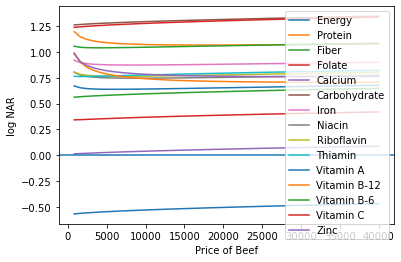

In [40]:
my_i = 'Beef'

fig,ax2 = plt.subplots()
ax2.set_ylabel('log NAR')
ax2.plot(P,[np.log(compensated_nutrient_adequacy_ratio(U0,my_prices(p0,i=my_i))[UseNutrients]) for p0 in P])
ax2.legend(UseNutrients)
ax2.axhline(0)
ax2.set_xlabel("Price of %s" % my_i)

Examine effects of price changes on revenue (if price change due to a
tax or subsidy) and compensating variation.



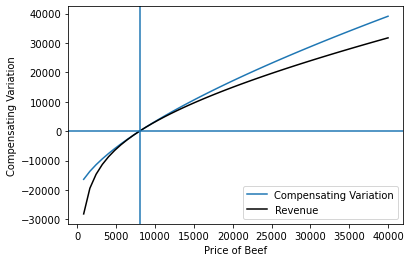

In [41]:
fig, ax1 = plt.subplots()

ax1.plot(P,[compensating_variation(U0,phat,my_prices(p0,i=my_i)) for p0 in P])
ax1.set_xlabel("Price of %s" % my_i)
ax1.set_ylabel("Compensating Variation")

ax1.plot(P,[revenue(U0,phat,my_prices(p0,i=my_i),type='Hicksian') for p0 in P],'k')
ax1.legend(('Compensating Variation','Revenue'))
ax1.axhline(0)
ax1.axvline(phat.loc[my_i])

Differences between revenue and compensating variation is deadweight-loss:



Text(0, 0.5, 'Deadweight Loss')

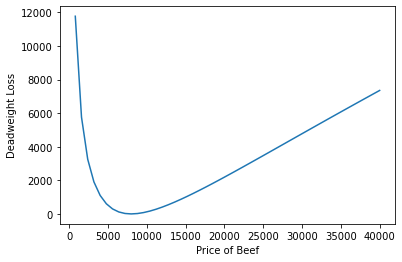

In [42]:
fig, ax1 = plt.subplots()

ax1.plot(P,[deadweight_loss(U0,phat,my_prices(p0,i=my_i)) for p0 in P])
ax1.set_xlabel("Price of %s" % my_i)
ax1.set_ylabel("Deadweight Loss")

## 1.8. #C Policy Cost.

Your proposed policy will have some cost. A tax or subsidy will involve a dead-weight loss. Without knowing the supply-side we won’t be able to measure this, but what if supply is perfectly elastic? What can you say about the costs of the different policy options? 

### 1.9. #C Value of Technical Innovation.

We’re not necessarily stuck with a particular mapping from food to nutrients; perhaps foods can be engineered or designed to deliver different nutritional outcomes. Identify particular foods that might be engineered in particular ways to address your policy goal (compare the example of “golden rice”, which engineered rice to increase the amount of vitamin A). What would the value of these innovations be? How might this information be used to guide investments in research and development of improved sorts of food? 